In [1]:
from pprint import pprint
import covsirphy as cs
import pandas as pd
cs.__version__

'2.17.0'

In [2]:
# Create DataLoader instance
data_loader = cs.DataLoader("input")

In [3]:
# The number of cases (JHU style)
jhu_data = data_loader.jhu()
# Population in each country
population_data = data_loader.population()
# Population pyramid
pyramid_data = data_loader.pyramid()

Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
	Please set verbose=2 to see the detailed citation list.
Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


In [4]:
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
17572,2021-03-06,Japan,-,437892,12422,8178,417292
17573,2021-03-07,Japan,-,438956,12468,8227,418261
17574,2021-03-08,Japan,-,439992,12510,8253,419229
17575,2021-03-09,Japan,-,440671,12112,8299,420260
17576,2021-03-10,Japan,-,441729,11955,8353,421421


In [5]:
jhu_data.cleaned().head()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
0,2020-01-01,Afghanistan,-,0,0,0,0
1,2020-01-02,Afghanistan,-,0,0,0,0
2,2020-01-03,Afghanistan,-,0,0,0,0
3,2020-01-04,Afghanistan,-,0,0,0,0
4,2020-01-05,Afghanistan,-,0,0,0,0


In [6]:
df_global = jhu_data.cleaned()

In [11]:
pprint(jhu_data.countries(), compact=True)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica',
 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam',
 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See',
 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ira

In [12]:
len(jhu_data.countries())

194

In [ ]:
# Raw data
pyramid_data.raw.tail()

,Country,Year,Sex,Age,Population
28315,Italy,1960,Female,118,9356
28316,Italy,1960,Female,119,9356
28317,Italy,1960,Female,120,9356
28318,Italy,1960,Female,121,9356
28319,Italy,1960,Female,122,9356


In [ ]:
print(pyramid_data.citation)

World Bank Group (2020), World Bank Open Data, https://data.worldbank.org/


In [ ]:
pyramid_data.subset("United States").tail()

,Age,Population,Per_total
113,118,299604,0.000953
114,119,299604,0.000953
115,120,299604,0.000953
116,121,299604,0.000953
117,122,299604,0.000953


In [8]:
df = jhu_data.cleaned()
jhu_first_date, jhu_last_date = df["Date"].min(), df["Date"].max()
jhu_elapsed = (jhu_last_date - jhu_first_date).days
print(f"{jhu_elapsed} days have passed from the date of the first record.")

421 days have passed from the date of the first record.


In [ ]:
# We can use a method of cs.DataLoader()
population_data = data_loader.population()
# Show cleaned dataset
population_data.value("Japan", province=None)

126529100

In [176]:
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [ ]:
# Population pyramid

pyramid_data = data_loader.pyramid()

In [ ]:
p_df = pyramid_data.subset("United States")

In [ ]:
p_df

,Age,Population,Per_total
0,0,3910983,0.012435
1,1,3910983,0.012435
2,2,3910983,0.012435
3,3,3910983,0.012435
4,4,3910983,0.012435
...,...,...,...
113,118,299604,0.000953
114,119,299604,0.000953
115,120,299604,0.000953
116,121,299604,0.000953


# Spending days a week - US

In [26]:
import pandas as pd
import numpy as np

_period_of_life_list = [
    "nursery", "nursery school", "elementary school", "middle school",
    "high school", "university/work", "work", "work", "work", "work",
    "retired", "retired", "retired"
]
df = pd.DataFrame(
    {
        "Age_first": [0, 3, 6, 11, 14, 19, 26, 36, 46, 56, 66, 76, 86],
        "Age_last": [2, 5, 10, 13, 18, 25, 35, 45, 55, 65, 75, 85, 95],
        "Period_of_life": _period_of_life_list,
        "Days": [3, 5, 6, 6, 7, 7, 6, 5, 5, 5, 4, 3, 2]
    }
)
# Adjustment by author
df["Types"] = df["Period_of_life"].replace(
    {
        "nursery": "school",
        "nursery school": "school",
        "elementary school": "school",
        "middle school": "school",
        "high school": "school",
        "university/work": "school/work"
    }
)
df["School"] = df[["Types", "Days"]].apply(lambda x: x[1] if "school" in x[0] else 0, axis=1)
df["Office"] = df[["Types", "Days"]].apply(lambda x: x[1] if "work" in x[0] else 0, axis=1)
df["Others"] = df["Days"] - df[["School", "Office"]].sum(axis=1)
df.loc[df["Others"] < 0, "Others"] = 0
df.loc[df.index[1:5], "School"] -= 1
df.loc[df.index[1:5], "Others"] += 1
df.loc[df.index[5], ["School", "Office", "Others"]] = [3, 3, 1]
df[["School", "Office", "Others"]] = df[["Days", "School", "Office", "Others"]].apply(
    lambda x: x[1:] / sum(x[1:]) * x[0], axis=1
).astype(np.int64)
df.loc[df.index[6:10], "Others"] += 1
df = df.drop(["Days", "Types"], axis=1)
# Show dataset
_out_df = df.copy()
_out_df

,Age_first,Age_last,Period_of_life,School,Office,Others
0,0,2,nursery,3,0,0
1,3,5,nursery school,4,0,1
2,6,10,elementary school,5,0,1
3,11,13,middle school,5,0,1
4,14,18,high school,6,0,1
5,19,25,university/work,3,3,1
6,26,35,work,0,6,1
7,36,45,work,0,5,1
8,46,55,work,0,5,1
9,56,65,work,0,5,1


In [ ]:
_out_df.to_csv("sample_data/daily_hour.csv")

In [27]:
def go_out(country, pyramid_data=pyramid_data):
    """
    Return the estimated number of days people usually go out.
    Args:
        country (str): coutry name
        pyramid_data (covsirphy.PopulationPyramidData): pyramid dataset
    
    Returns:
        pandas.DataFrame
    """
    p_df = pyramid_data.subset(country)
    p_df["Cumsum"] = p_df["Population"].cumsum()
    df = pd.merge(_out_df, p_df, left_on="Age_last", right_on="Age", how="left")
    df["Population"] = df["Cumsum"].diff()
    df.loc[df.index[0], "Population"] = df.loc[df.index[0], "Cumsum"]
    df["Population"] = df["Population"].astype(np.int64)
    df["Portion"] = df["Population"] / df["Population"].sum()
    return df.drop(["Per_total", "Cumsum"], axis=1)

days_us = go_out("United States")
days_us

,Age_first,Age_last,Period_of_life,School,Office,Others,Age,Population,Portion
0,0,2,nursery,3,0,0,2,11732949,0.038290
1,3,5,nursery school,4,0,1,5,11869337,0.038735
2,6,10,elementary school,5,0,1,10,20408368,0.066601
3,11,13,middle school,5,0,1,13,12656652,0.041304
4,14,18,high school,6,0,1,18,21176720,0.069109
5,19,25,university/work,3,3,1,25,31355852,0.102328
6,26,35,work,0,6,1,35,45837957,0.149589
7,36,45,work,0,5,1,45,41096911,0.134117
8,46,55,work,0,5,1,55,41210566,0.134488
9,56,65,work,0,5,1,65,41162200,0.134330


# Global analysis

In [11]:
data_cols = ["Infected", "Fatal", "Recovered"]
rate_cols = ["Fatal per Confirmed", "Recovered per Confirmed", "Fatal per (Fatal or Recovered)"]

In [12]:
jhu_data.raw.head()

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
0,2020-01-01,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2020-01-02,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-01-03,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-01-04,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-01-05,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.0


In [13]:
total_df = jhu_data.total()
total_df = total_df.loc[total_df.index <= jhu_last_date, :]
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2021-02-20,111170844,39764106,2462914,68943824,0.022154,0.620161,0.034491
2021-02-21,111451131,39835085,2468429,69147617,0.022148,0.620430,0.034468
2021-02-22,111748239,39948753,2474863,69324623,0.022147,0.620364,0.034469
2021-02-23,112109660,40039317,2484850,69585493,0.022164,0.620691,0.034478
2021-02-24,112116171,40044019,2484985,69587167,0.022164,0.620670,0.034479


In [14]:
total_df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
               '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22',
               '2021-02-23', '2021-02-24'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

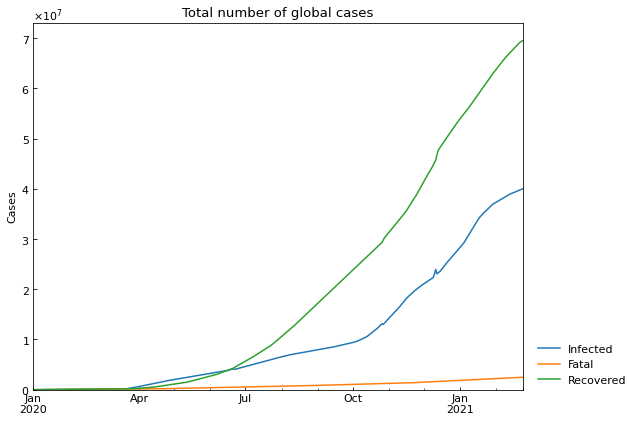

In [ ]:
cs.line_plot(total_df[data_cols], "Total number of global cases")

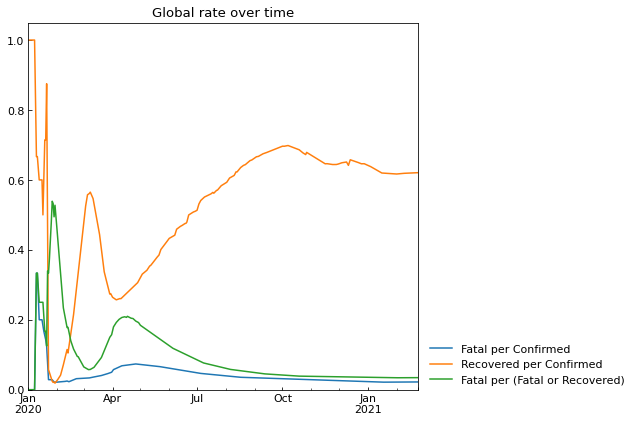

In [ ]:
cs.line_plot(total_df[rate_cols], "Global rate over time", ylabel="", math_scale=False)

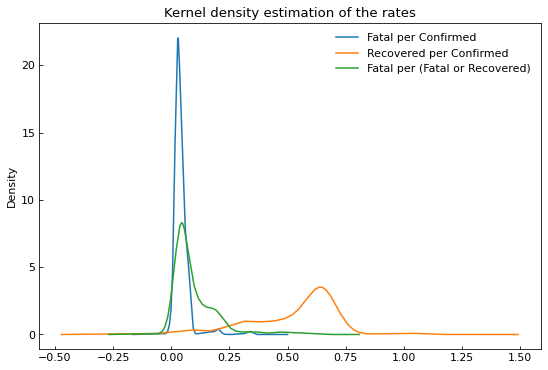

In [ ]:
import matplotlib.pyplot as plt

total_df[rate_cols].plot.kde()
plt.title("Kernel density estimation of the rates")
plt.show()

In [ ]:
total_df[rate_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,420.0,0.042189,0.036732,0.000000,0.023356,0.032593,0.048830,0.333333
Recovered per Confirmed,420.0,0.526905,0.188611,0.018707,0.414598,0.616567,0.650202,1.000000
Fatal per (Fatal or Recovered),420.0,0.095886,0.091838,0.000000,0.035905,0.057519,0.125411,0.538961


# US 

In [7]:
total_us_df, _ = jhu_data.records("United States")
#total_us_df = total_us_df.loc[total_us_df["Date"]]
total_us_df = total_us_df.query('Date >= "2020-02-09" and Date <= "2020-09-23"')
total_us_df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
223,2020-09-19,6769847,4035156,199229,2535462
224,2020-09-20,6808147,4060179,199497,2548471
225,2020-09-21,6860061,4086799,199925,2573337
226,2020-09-22,6899723,4094927,200954,2603842
227,2020-09-23,6938731,4109962,202009,2626760


In [8]:
statis_df = total_us_df[["Confirmed","Infected","Fatal","Recovered"]].describe().T
#statis_df.to_csv(r"G:\book-edit\[Final]COVID-19-forecasting\book-writing\table\SIR\us_case_summary_2020-02-09_2020-09-23.csv")
statis_df

,count,mean,std,min,25%,50%,75%,max
Confirmed,228.0,2.450130e+06,2.237711e+06,12.0,374894.75,1826899.5,4376956.25,6938731.0
Infected,228.0,1.602381e+06,1.355917e+06,9.0,343483.00,1267299.5,2884711.50,4109962.0
Fatal,228.0,9.437273e+04,6.856146e+04,0.0,14102.25,109088.5,150582.75,202009.0
Recovered,228.0,7.533761e+05,8.278249e+05,3.0,17309.50,453539.5,1341662.00,2626760.0


In [9]:
total_us_df = total_us_df.set_index('Date')
total_us_df.tail()

,Confirmed,Infected,Fatal,Recovered
Date,,,,
2020-09-19,6769847,4035156,199229,2535462
2020-09-20,6808147,4060179,199497,2548471
2020-09-21,6860061,4086799,199925,2573337
2020-09-22,6899723,4094927,200954,2603842
2020-09-23,6938731,4109962,202009,2626760


In [10]:
total_us_df['Fatal per Confirmed'] = total_us_df['Fatal'] / total_us_df['Confirmed']
total_us_df['Recovered per Confirmed'] = total_us_df['Recovered'] / total_us_df['Confirmed']
total_us_df['Fatal per (Fatal or Recovered)'] = total_us_df['Fatal'] / (total_us_df['Fatal']+total_us_df['Recovered'])
total_us_df = total_us_df.round({'Fatal per Confirmed': 6, 'Recovered per Confirmed': 6, 'Fatal per (Fatal or Recovered)':6})
total_us_df

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-02-09,12,9,0,3,0.000000,0.250000,0.000000
2020-02-10,12,9,0,3,0.000000,0.250000,0.000000
2020-02-11,13,10,0,3,0.000000,0.230769,0.000000
2020-02-12,13,10,0,3,0.000000,0.230769,0.000000
2020-02-13,14,11,0,3,0.000000,0.214286,0.000000
...,...,...,...,...,...,...,...
2020-09-19,6769847,4035156,199229,2535462,0.029429,0.374523,0.072852
2020-09-20,6808147,4060179,199497,2548471,0.029303,0.374327,0.072598
2020-09-21,6860061,4086799,199925,2573337,0.029143,0.375119,0.072090


In [11]:
data_cols = ["Infected", "Fatal", "Recovered"]
rate_cols = ["Fatal per Confirmed", "Recovered per Confirmed", "Fatal per (Fatal or Recovered)"]

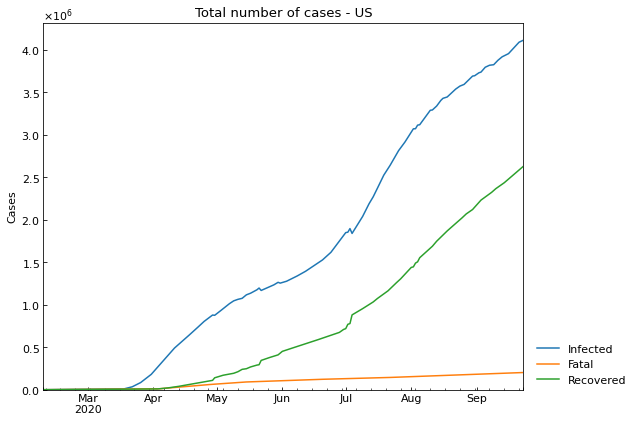

In [12]:
cs.line_plot(total_us_df[data_cols], "Total number of cases - US")

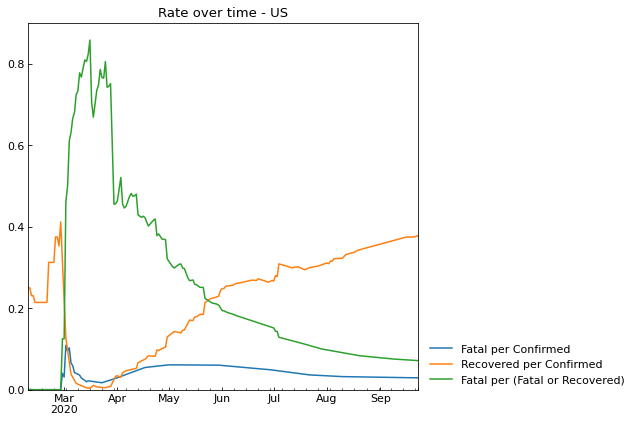

In [13]:
cs.line_plot(total_us_df[rate_cols], "Rate over time - US", ylabel="", math_scale=False)

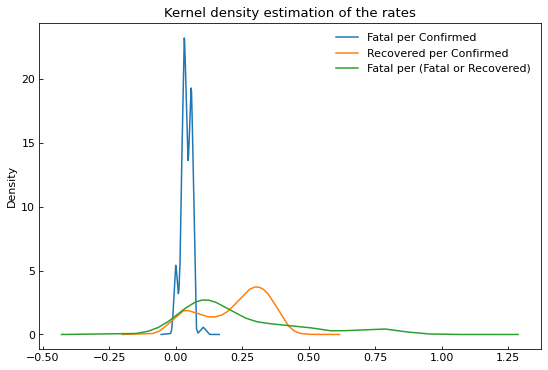

In [14]:
import matplotlib.pyplot as plt

total_us_df[rate_cols].plot.kde()
plt.title("Kernel density estimation of the rates")
plt.show()

In [15]:
jhu_data.records("United States")

(          Date  Confirmed  Infected   Fatal  Recovered
 0   2020-02-09         12         9       0          3
 1   2020-02-10         12         9       0          3
 2   2020-02-11         13        10       0          3
 3   2020-02-12         13        10       0          3
 4   2020-02-13         14        11       0          3
 ..         ...        ...       ...     ...        ...
 391 2021-03-06   28952970  15319239  524362   13109369
 392 2021-03-07   28993873  15305954  525033   13162886
 393 2021-03-08   29038631  15297157  525752   13215722
 394 2021-03-09   29096048  15300470  527699   13267879
 395 2021-03-10   29096048  15248993  527699   13319356
 
 [396 rows x 5 columns],
 'partially complemented recovered data')

In [16]:
type(jhu_data)

covsirphy.cleaning.jhu_data.JHUData

# S-R trend - US

In [17]:
# Create instance of `Scenario` class
snl = cs.Scenario(jhu_data, population_data, country="US", province=None)

In [ ]:
# Fix the first/last date of the records and today
# today must be in the range of (first_date, last_date).
# Default: None means automatically specified (min/max will be used)
snl.timepoints(first_date="09Feb2020", last_date="23Sep2020", today="23Sep2020")
# Check dates
print(snl.first_date)
print(snl.last_date)
print(snl.today)
# Summarize (Empty because no phases are registered)
snl.summary()

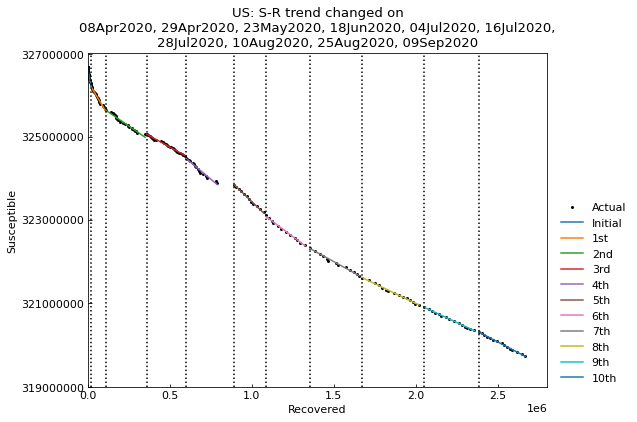

,Type,Start,End,Population
0th,Past,09Feb2020,07Apr2020,326687501
1st,Past,08Apr2020,28Apr2020,326687501
2nd,Past,29Apr2020,22May2020,326687501
3rd,Past,23May2020,17Jun2020,326687501
4th,Past,18Jun2020,03Jul2020,326687501
5th,Past,04Jul2020,15Jul2020,326687501
6th,Past,16Jul2020,27Jul2020,326687501
7th,Past,28Jul2020,09Aug2020,326687501
8th,Past,10Aug2020,24Aug2020,326687501
9th,Past,25Aug2020,08Sep2020,326687501


In [19]:
snl.trend()
snl.summary()

Plots of Actual data do not show a line. This means SIR-F parameters were changed at some time-points. In the next section, we will find the time-points, assuming that there are four change points in Italy dataset.

# Scenario - US

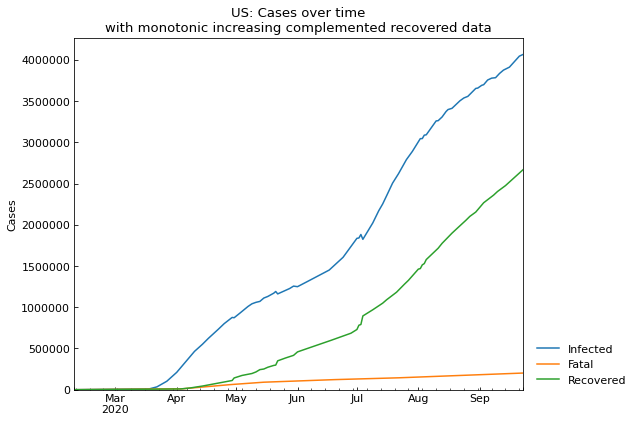

,Date,Infected,Fatal,Recovered
223,2020-09-19,3993172,199229,2577446
224,2020-09-20,4017979,199497,2590671
225,2020-09-21,4044187,199925,2615949
226,2020-09-22,4051810,200954,2646959
227,2020-09-23,4066466,202009,2670256


In [20]:
snl.records().tail()

In [21]:
# Estimate SIR-F parameters

snl.estimate(cs.SIRF, timeout=120)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	10th phase (09Sep2020 - 23Sep2020): finished  600 trials in 0 min 40 sec
Completed optimization. Total: 3 min 23 sec


In [22]:
# Compare parameters

snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/beta [day],alpha1 [-],1/alpha2 [day],RMSLE,Trials,Runtime
0th,Past,09Feb2020,07Apr2020,326687501,SIR-F,52.49,0.001394,0.000528,0.048728,0.000399,360,627,5,0.001,473,1.071287,862,1 min 30 sec
1st,Past,08Apr2020,28Apr2020,326687501,SIR-F,5.59,0.035618,0.000555,0.012803,0.001654,360,151,19,0.036,450,0.058307,435,0 min 40 sec
2nd,Past,29Apr2020,22May2020,326687501,SIR-F,1.86,0.002005,0.000436,0.005332,0.002425,360,103,46,0.002,573,0.058035,1028,1 min 51 sec
3rd,Past,23May2020,17Jun2020,326687501,SIR-F,2.13,0.000137,0.000168,0.004032,0.001721,360,145,62,0.000,1486,0.017197,334,0 min 30 sec
4th,Past,18Jun2020,03Jul2020,326687501,SIR-F,4.86,0.001340,0.000071,0.006166,0.001196,360,209,40,0.001,3515,0.027218,543,0 min 50 sec
5th,Past,04Jul2020,15Jul2020,326687501,SIR-F,4.04,0.000416,0.000087,0.007634,0.001801,360,138,32,0.000,2878,0.007454,719,1 min 10 sec
6th,Past,16Jul2020,27Jul2020,326687501,SIR-F,3.48,0.000416,0.000087,0.006385,0.001748,360,143,39,0.000,2878,0.009638,848,1 min 10 sec
7th,Past,28Jul2020,09Aug2020,326687501,SIR-F,2.25,0.000741,0.000087,0.004378,0.001859,360,134,57,0.001,2878,0.012337,442,0 min 40 sec
8th,Past,10Aug2020,24Aug2020,326687501,SIR-F,1.86,0.001473,0.000054,0.003443,0.001798,360,139,72,0.001,4601,0.011140,235,0 min 20 sec
9th,Past,25Aug2020,08Sep2020,326687501,SIR-F,2.10,0.000846,0.000067,0.002796,0.001264,360,197,89,0.001,3711,0.009336,235,0 min 20 sec


In [19]:
df_us_summary = snl.summary()
df_us_summary.to_csv(r"G:\book-edit\[Final]COVID-19-forecasting\book-writing\table\SIR-newDateRange\usa_scenario_summary-org.csv")

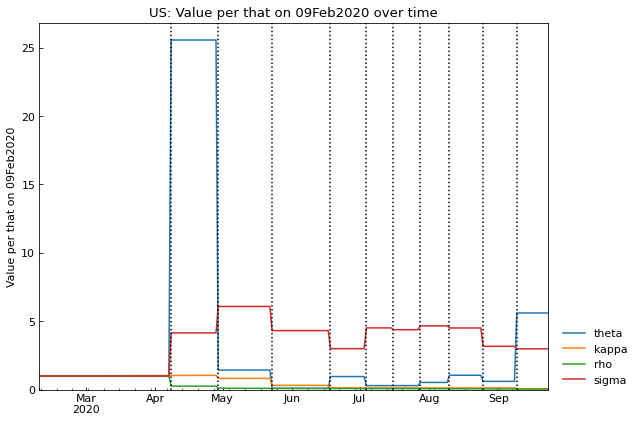

In [20]:
_ = snl.history_rate()

Here, we will predict the effect of school closure (started before 04Mar2020), lockdown on 13Mar2020 with assumtion that the effect will be shown from the start date of 3rd phase.

In [21]:
snl.get("Start", name="Main", phase="3rd")

'23May2020'

In [28]:
us_out_df = go_out("United States")
us_out_df

,Age_first,Age_last,Period_of_life,School,Office,Others,Age,Population,Portion
0,0,2,nursery,3,0,0,2,11732949,0.038290
1,3,5,nursery school,4,0,1,5,11869337,0.038735
2,6,10,elementary school,5,0,1,10,20408368,0.066601
3,11,13,middle school,5,0,1,13,12656652,0.041304
4,14,18,high school,6,0,1,18,21176720,0.069109
5,19,25,university/work,3,3,1,25,31355852,0.102328
6,26,35,work,0,6,1,35,45837957,0.149589
7,36,45,work,0,5,1,45,41096911,0.134117
8,46,55,work,0,5,1,55,41210566,0.134488
9,56,65,work,0,5,1,65,41162200,0.134330


In [29]:
df = us_out_df.copy()
gs_before = (df[["School", "Office", "Others"]].sum(axis=1) * df["Portion"]).sum()
print(f"{round(gs_before, 1)} days in a week susceptible people go out.")

5.9 days in a week susceptible people go out.


# Estimation of g8 after school closure/lockdown

In [31]:
c_before, c_after = 1.0, 0.81

rho_before = snl.get("rho", name="Main", phase="1st")
rho_after = snl.get("rho", name="Main", phase="3rd")
gs_after = rho_after / rho_before / c_after * gs_before * c_before
print(f"{round(gs_after, 1)} days in a week susceptible people go out after lockdown.")

2.3 days in a week susceptible people go out after lockdown.


In [32]:
df = us_out_df.copy()
df["School"] = 0
df.loc[df["Office"] > 0, "Office"] = 1
sum_so = (df[["School", "Office"]].sum(axis=1) * df["Portion"]).sum()
df.loc[df["Others"] > 0, "Others"] = round(gs_after - sum_so, 1)
us_out_after_df = df.copy()
us_out_after_df

,Age_first,Age_last,Period_of_life,School,Office,Others,Age,Population,Portion
0,0,2,nursery,0,0,0.0,2,11732949,0.038290
1,3,5,nursery school,0,0,1.7,5,11869337,0.038735
2,6,10,elementary school,0,0,1.7,10,20408368,0.066601
3,11,13,middle school,0,0,1.7,13,12656652,0.041304
4,14,18,high school,0,0,1.7,18,21176720,0.069109
5,19,25,university/work,0,1,1.7,25,31355852,0.102328
6,26,35,work,0,1,1.7,35,45837957,0.149589
7,36,45,work,0,1,1.7,45,41096911,0.134117
8,46,55,work,0,1,1.7,55,41210566,0.134488
9,56,65,work,0,1,1.7,65,41162200,0.134330


In [33]:
us_out_after_df.to_csv("spendingDays-afterlockdown.csv")

In [34]:
df = us_out_after_df.copy()
gs_after2 = (df[["School", "Office", "Others"]].sum(axis=1) * df["Portion"]).sum()
print(f"{round(gs_after2, 1)} days in a week susceptible people go out after lockdown.")

2.3 days in a week susceptible people go out after lockdown.


# Predict future with the last parameters

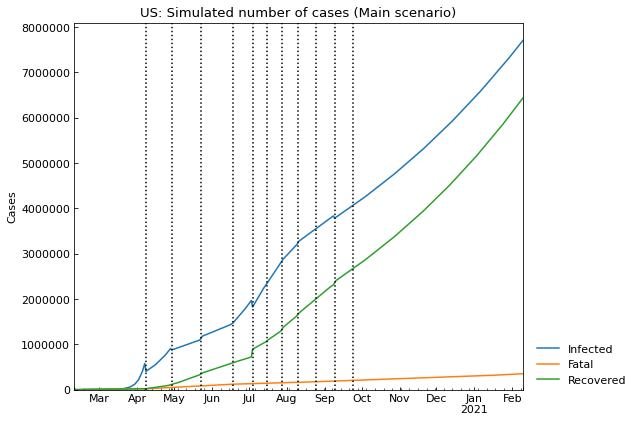

,Date,Confirmed,Fatal,Infected,Recovered
358,2021-02-01 00:00:00,13867411,339773,7406918,6120720
359,2021-02-02 00:00:00,13937616,341175,7440381,6156060
360,2021-02-03 00:00:00,14008124,342584,7473980,6191560
361,2021-02-04 00:00:00,14078934,343999,7507714,6227221
362,2021-02-05 00:00:00,14150047,345420,7541585,6263042
363,2021-02-06 00:00:00,14221464,346847,7575592,6299025
364,2021-02-07 00:00:00,14293187,348281,7609736,6335170
365,2021-02-08 00:00:00,14365217,349721,7644018,6371478
366,2021-02-09 00:00:00,14437554,351167,7678437,6407950
367,2021-02-10 00:00:00,14510199,352620,7712994,6444585


In [36]:
snl.clear()
# predict to Feb 9, 2021
snl.add(days =139 )
snl.simulate().tail(10).style.background_gradient(axis=0)

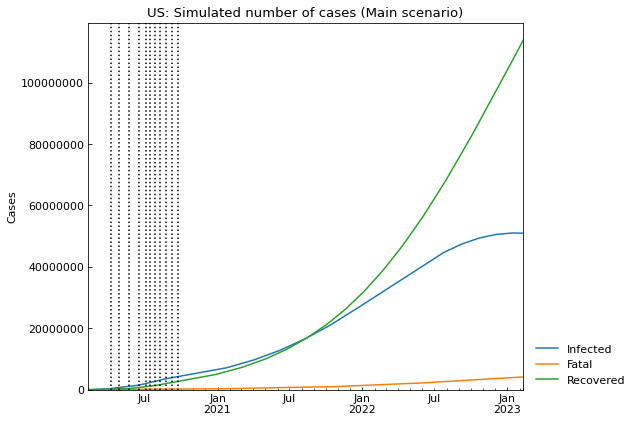

,Date,Confirmed,Fatal,Infected,Recovered
1093,2023-02-06 00:00:00,167965866,4122691,50981335,112861840
1094,2023-02-07 00:00:00,168210323,4130464,50975331,113104528
1095,2023-02-08 00:00:00,168454374,4138234,50968954,113347186
1096,2023-02-09 00:00:00,168698017,4145999,50962206,113589812
1097,2023-02-10 00:00:00,168941251,4153761,50955087,113832403


In [39]:
snl.clear()
# predict to Feb 9, 2023
snl.add(days=869)
snl.simulate().tail(5).style.background_gradient(axis=0)

# Effect of expected new medicines

In [41]:
sigma_before = snl.get("sigma", name="Main", phase="3rd")
kappa_before = snl.get("kappa", name="Main", phase="3rd")
(sigma_before, kappa_before)

(0.0017210874803207479, 0.0001681726101965217)

In [42]:
# Tentative evaluation with clinical study
sigma_med = snl.get("tau", name="Main", phase="3rd") * (25 / 53) / ((10 + 18) * 1440)
kappa_med = snl.get("tau", name="Main", phase="3rd") * (7 / 53) / ((10 + 18) * 1440)
(sigma_med, kappa_med)

(0.0042115902964959566, 0.0011792452830188679)

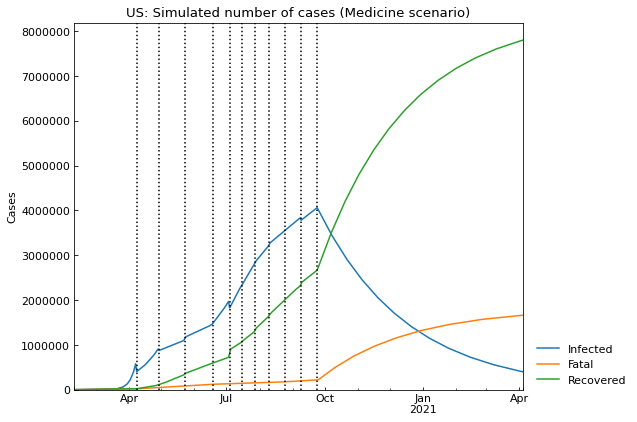

,Date,Confirmed,Fatal,Infected,Recovered
415,2021-03-30 00:00:00,9840331,1651018,428506,7760807
416,2021-03-31 00:00:00,9844411,1653059,423372,7767980
417,2021-04-01 00:00:00,9848440,1655074,418299,7775067
418,2021-04-02 00:00:00,9852422,1657066,413286,7782070
419,2021-04-03 00:00:00,9856357,1659034,408334,7788989
420,2021-04-04 00:00:00,9860245,1660979,403440,7795826
421,2021-04-05 00:00:00,9864086,1662901,398604,7802581


In [44]:
snl.clear(name="Medicine")
# predict to Feb 9, 2021
snl.add(days=193, name="Medicine", kappa=kappa_med, sigma=sigma_med)
snl.simulate(name="Medicine").tail(7).style.background_gradient(axis=0)

# Effect of lockdown

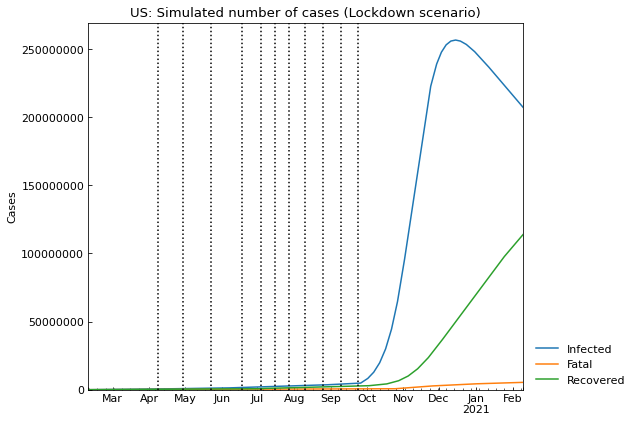

,Date,Confirmed,Fatal,Infected,Recovered
361,2021-02-04 00:00:00,326254507,5242919,212976352,108035236
362,2021-02-05 00:00:00,326281037,5267564,211966754,109046719
363,2021-02-06 00:00:00,326305804,5292078,210960321,110053405
364,2021-02-07 00:00:00,326328945,5316465,209957171,111055309
365,2021-02-08 00:00:00,326350583,5340724,208957414,112052445
366,2021-02-09 00:00:00,326370838,5364858,207961153,113044827
367,2021-02-10 00:00:00,326389820,5388868,206968480,114032472


In [48]:
# Add lockdown scenario
snl.clear(name="Lockdown")
rho_lock = snl.get("rho", phase="0th") / 2
#rho_lock = us_scenario.get("rho", phase="3rd") / 2
snl.add(end_date="09Feb2021", name="Lockdown", rho=rho_lock)
snl.simulate(name="Lockdown").tail(7).style.background_gradient(axis=0)

# Effect of vaccine 

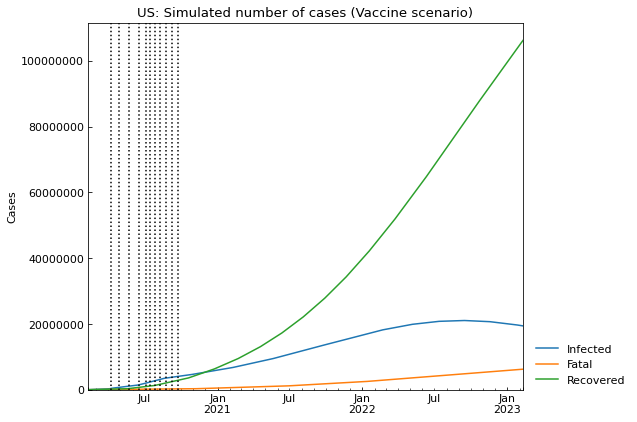

,Date,Confirmed,Fatal,Infected,Recovered
1088,2023-02-01 00:00:00,130565832,6160465,19555767,104849600
1089,2023-02-02 00:00:00,130717174,6169536,19536563,105011075
1090,2023-02-03 00:00:00,130868251,6178598,19517262,105172391
1091,2023-02-04 00:00:00,131019062,6187650,19497865,105333547
1092,2023-02-05 00:00:00,131169607,6196692,19478372,105494543
1093,2023-02-06 00:00:00,131319885,6205724,19458784,105655377
1094,2023-02-07 00:00:00,131469896,6214746,19439101,105816049
1095,2023-02-08 00:00:00,131619640,6223758,19419324,105976558
1096,2023-02-09 00:00:00,131769118,6232760,19399454,106136904
1097,2023-02-10 00:00:00,131918327,6241752,19379490,106297085


In [55]:
# Add vaccine scenario
snl.clear(name="Vaccine")
rho_vac = snl.get("rho", phase="3rd") * 0.8
kappa_vac = snl.get("kappa", phase="3rd") * 0.6
sigma_vac = snl.get("sigma", phase="3rd") * 1.2
snl.add(end_date="09Feb2023", name="Vaccine",  rho=rho_vac, kappa=kappa_vac, sigma=sigma_vac)
snl.simulate(name="Vaccine").tail(10).style.background_gradient(axis=0)

In [62]:
df_us_summary = snl.summary()

In [65]:
df_us_summary 

Type      Start        End  Population    ODE     Rt  \
Scenario Phase                                                           
Main     0th      Past  09Feb2020  07Apr2020   326687501  SIR-F  52.49   
         1st      Past  08Apr2020  28Apr2020   326687501  SIR-F   5.59   
         2nd      Past  29Apr2020  22May2020   326687501  SIR-F   1.86   
         3rd      Past  23May2020  17Jun2020   326687501  SIR-F   2.13   
         4th      Past  18Jun2020  03Jul2020   326687501  SIR-F   4.86   
         5th      Past  04Jul2020  15Jul2020   326687501  SIR-F   4.04   
         6th      Past  16Jul2020  27Jul2020   326687501  SIR-F   3.48   
         7th      Past  28Jul2020  09Aug2020   326687501  SIR-F   2.25   
         8th      Past  10Aug2020  24Aug2020   326687501  SIR-F   1.86   
         9th      Past  25Aug2020  08Sep2020   326687501  SIR-F   2.10   
         10th     Past  09Sep2020  23Sep2020   326687501  SIR-F   2.01   
         11th   Future  24Sep2020  09Feb2023   326687501  SIR-F   2.01   
Medicine 0th      Past  09Feb2020  07Apr2020   326687501  SIR-F  52.49   
         1st      Past  08Apr2020  28Apr2020   326687501  SIR-F   5.59   
         2nd      Past  29Apr2020  22May2020   326687501  SIR-F   1.86   
         3rd      Past  23May2020  17Jun2020   326687501  SIR-F   2.13   
         4th      Past  18Jun2020  03Jul2020   326687501  SIR-F   4.86   
         5th      Past  04Jul2020  15Jul2020   326687501  SIR-F   4.04   
         6th      Past  16Jul2020  27Jul2020   326687501  SIR-F   3.48   
         7th      Past  28Jul2020  09Aug2020   326687501  SIR-F   2.25   
         8th      Past  10Aug2020  24Aug2020   326687501  SIR-F   1.86   
         9th      Past  25Aug2020  08Sep2020   326687501  SIR-F   2.10   
         10th     Past  09Sep2020  23Sep2020   326687501  SIR-F   2.01   
         11th   Future  24Sep2020  04Apr2021   326687501  SIR-F   0.45   
Lockdown 0th      Past  09Feb2020  07Apr2020   326687501  SIR-F  52.49   
         1st      Past  08Apr2020  28Apr2020   326687501  SIR-F   5.59   
         2nd      Past  29Apr2020  22May2020   326687501  SIR-F   1.86   
         3rd      Past  23May2020  17Jun2020   326687501  SIR-F   2.13   
         4th      Past  18Jun2020  03Jul2020   326687501  SIR-F   4.86   
         5th      Past  04Jul2020  15Jul2020   326687501  SIR-F   4.04   
         6th      Past  16Jul2020  27Jul2020   326687501  SIR-F   3.48   
         7th      Past  28Jul2020  09Aug2020   326687501  SIR-F   2.25   
         8th      Past  10Aug2020  24Aug2020   326687501  SIR-F   1.86   
         9th      Past  25Aug2020  08Sep2020   326687501  SIR-F   2.10   
         10th     Past  09Sep2020  23Sep2020   326687501  SIR-F   2.01   
         11th   Future  24Sep2020  09Feb2021   326687501  SIR-F  19.83   
Vaccine  0th      Past  09Feb2020  07Apr2020   326687501  SIR-F  52.49   
         1st      Past  08Apr2020  28Apr2020   326687501  SIR-F   5.59   
         2nd      Past  29Apr2020  22May2020   326687501  SIR-F   1.86   
         3rd      Past  23May2020  17Jun2020   326687501  SIR-F   2.13   
         4th      Past  18Jun2020  03Jul2020   326687501  SIR-F   4.86   
         5th      Past  04Jul2020  15Jul2020   326687501  SIR-F   4.04   
         6th      Past  16Jul2020  27Jul2020   326687501  SIR-F   3.48   
         7th      Past  28Jul2020  09Aug2020   326687501  SIR-F   2.25   
         8th      Past  10Aug2020  24Aug2020   326687501  SIR-F   1.86   
         9th      Past  25Aug2020  08Sep2020   326687501  SIR-F   2.10   
         10th     Past  09Sep2020  23Sep2020   326687501  SIR-F   2.01   
         11th   Future  24Sep2020  09Feb2023   326687501  SIR-F   1.48   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     0th    0.001394  0.000528  0.048728  0.000399  360             5   
         1st    0.035618  0.000555  0.012803  0.001654  360            19   
         

In [66]:
# main scenario

#df_us_main = df_us_summary.loc[df_us_summary["Scenario"]=="Main"]
index_list = list(df_us_summary.index)
df_us_main = df_us_summary.loc[index_list[0:12],:]
df_us_medicine = df_us_summary.loc[index_list[12:24],:]
df_us_lockdown = df_us_summary.loc[index_list[24:36],:]
df_us_vaccine = df_us_summary.loc[index_list[36:48],:]

In [74]:
index = ['1st', '2nd', '3rd',
         '4th', '5th', '6th', '7th',
        '8th', '9th', '10th', '11th',
        '12th']
rho_norm = [float(i)/sum(list(df_us_main["rho"])) for i in list(df_us_main["rho"])]
rt_norm = [float(i)/sum(list(df_us_main["Rt"])) for i in list(df_us_main["Rt"])]
sigma_norm = [float(i)/sum(list(df_us_main["sigma"])) for i in list(df_us_main["sigma"])]
df = pd.DataFrame(data = {'Rho': rho_norm,
                   'Rt': rt_norm, 'Sigma':sigma_norm}, index=index)

<AxesSubplot:>

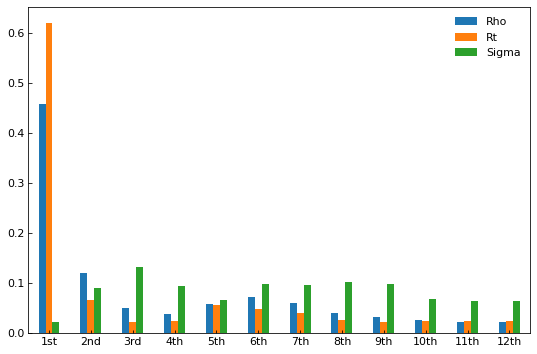

In [75]:
df.plot.bar(rot=0)

<AxesSubplot:>

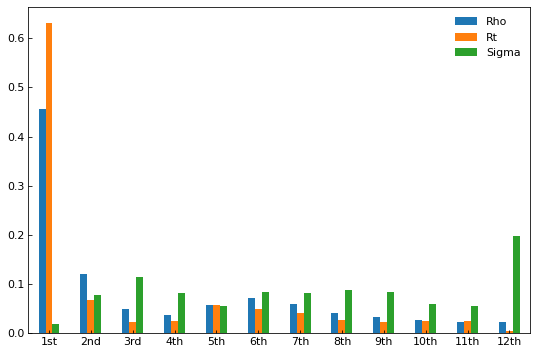

In [78]:
index = ['1st', '2nd', '3rd',
         '4th', '5th', '6th', '7th',
        '8th', '9th', '10th', '11th',
        '12th']
rho_norm = [float(i)/sum(list(df_us_medicine["rho"])) for i in list(df_us_medicine["rho"])]
rt_norm = [float(i)/sum(list(df_us_medicine["Rt"])) for i in list(df_us_medicine["Rt"])]
sigma_norm = [float(i)/sum(list(df_us_medicine["sigma"])) for i in list(df_us_medicine["sigma"])]
df = pd.DataFrame(data = {'Rho': rho_norm,
                   'Rt': rt_norm, 'Sigma':sigma_norm}, index=index)

df.plot.bar(rot=0)

<AxesSubplot:>

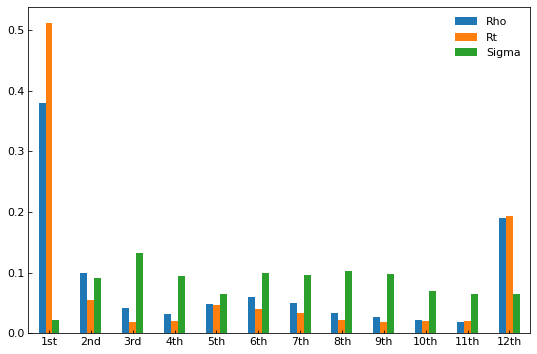

In [69]:
index = ['1st', '2nd', '3rd',
         '4th', '5th', '6th', '7th',
        '8th', '9th', '10th', '11th',
        '12th']
rho_norm = [float(i)/sum(list(df_us_lockdown["rho"])) for i in list(df_us_lockdown["rho"])]
rt_norm = [float(i)/sum(list(df_us_lockdown["Rt"])) for i in list(df_us_lockdown["Rt"])]
sigma_norm = [float(i)/sum(list(df_us_lockdown["sigma"])) for i in list(df_us_lockdown["sigma"])]
df = pd.DataFrame(data = {'Rho': rho_norm,
                   'Rt': rt_norm, 'Sigma':sigma_norm}, index=index)

df.plot.bar(rot=0)

<AxesSubplot:>

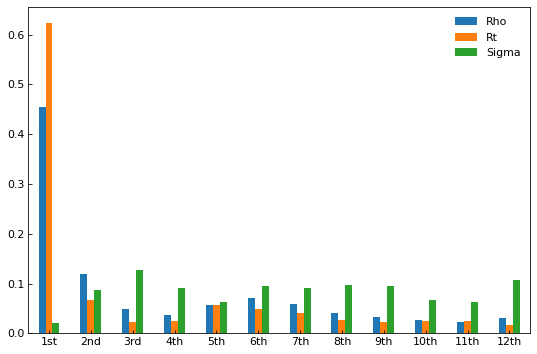

In [77]:
index = ['1st', '2nd', '3rd',
         '4th', '5th', '6th', '7th',
        '8th', '9th', '10th', '11th',
        '12th']
rho_norm = [float(i)/sum(list(df_us_vaccine["rho"])) for i in list(df_us_vaccine["rho"])]
rt_norm = [float(i)/sum(list(df_us_vaccine["Rt"])) for i in list(df_us_vaccine["Rt"])]
sigma_norm = [float(i)/sum(list(df_us_vaccine["sigma"])) for i in list(df_us_vaccine["sigma"])]
df = pd.DataFrame(data = {'Rho': rho_norm,
                   'Rt': rt_norm, 'Sigma':sigma_norm}, index=index)

df.plot.bar(rot=0)

In [71]:
list(df_us_main["Rt"])

[52.49, 5.59, 1.86, 2.13, 4.86, 4.04, 3.48, 2.25, 1.86, 2.1, 2.01, 2.01]

<AxesSubplot:>

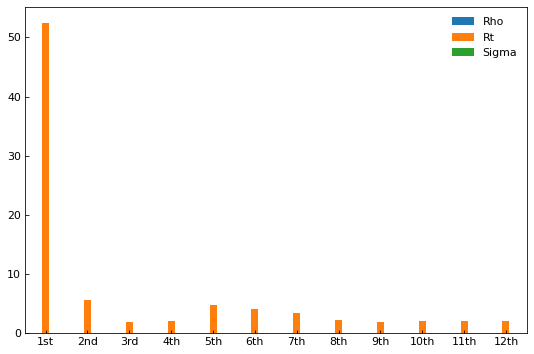

In [72]:
index = ['1st', '2nd', '3rd',
         '4th', '5th', '6th', '7th',
        '8th', '9th', '10th', '11th',
        '12th']
#rho_norm = [float(i)/sum(list(df_us_main["rho"])) for i in list(df_us_main["rho"])]
#rt_norm = [float(i)/sum(list(df_us_main["Rt"])) for i in list(df_us_main["Rt"])]
#sigma_norm = [float(i)/sum(list(df_us_main["sigma"])) for i in list(df_us_main["sigma"])]
df = pd.DataFrame(data = {'Rho': list(df_us_main["rho"]),
                   'Rt': list(df_us_main["Rt"]), 'Sigma':list(df_us_main["sigma"])}, index=index)
df.plot.bar(rot=0)

# SIR model

In [23]:
# Create instance of `Scenario` class
snl = cs.Scenario(jhu_data, population_data, country="US", province=None)

# Fix the first/last date of the records and today
# today must be in the range of (first_date, last_date).
# Default: None means automatically specified (min/max will be used)
snl.timepoints(first_date="09Feb2020", last_date="23Sep2020", today="23Sep2020")
# Check dates
print(snl.first_date)
print(snl.last_date)
print(snl.today)
# Summarize (Empty because no phases are registered)
snl.summary()

09Feb2020
23Sep2020
23Sep2020


""


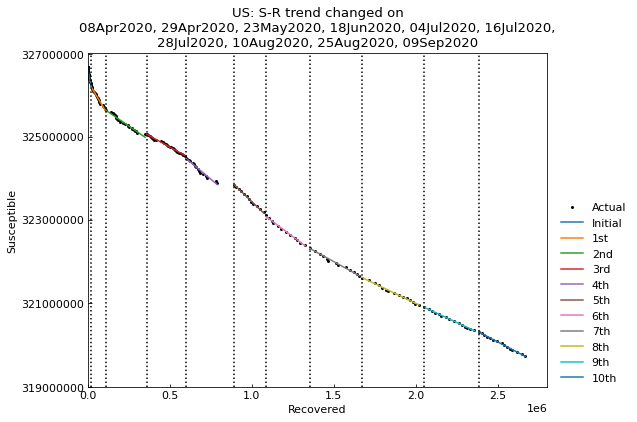

,Type,Start,End,Population
0th,Past,09Feb2020,07Apr2020,326687501
1st,Past,08Apr2020,28Apr2020,326687501
2nd,Past,29Apr2020,22May2020,326687501
3rd,Past,23May2020,17Jun2020,326687501
4th,Past,18Jun2020,03Jul2020,326687501
5th,Past,04Jul2020,15Jul2020,326687501
6th,Past,16Jul2020,27Jul2020,326687501
7th,Past,28Jul2020,09Aug2020,326687501
8th,Past,10Aug2020,24Aug2020,326687501
9th,Past,25Aug2020,08Sep2020,326687501


In [25]:
snl.trend()
snl.summary()

In [26]:
# Estimate SIR-F parameters

snl.estimate(cs.SIR, timeout=120)


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	10th phase (09Sep2020 - 23Sep2020): finished  222 trials in 0 min 10 sec
Completed optimization. Total: 1 min 33 sec


In [27]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,09Feb2020,07Apr2020,326687501,SIR,25.91,0.031196,0.001204,240,138,5,0.892008,554,0 min 50 sec
1st,Past,08Apr2020,28Apr2020,326687501,SIR,4.72,0.008573,0.001814,240,91,19,0.037964,696,1 min 0 sec
2nd,Past,29Apr2020,22May2020,326687501,SIR,2.30,0.004197,0.001827,240,91,39,0.033963,698,1 min 0 sec
3rd,Past,23May2020,17Jun2020,326687501,SIR,2.10,0.002704,0.001290,240,129,61,0.011882,110,0 min 10 sec
4th,Past,18Jun2020,03Jul2020,326687501,SIR,3.39,0.003885,0.001145,240,145,42,0.009422,621,0 min 50 sec
5th,Past,04Jul2020,15Jul2020,326687501,SIR,3.68,0.004889,0.001330,240,125,34,0.002914,141,0 min 10 sec
6th,Past,16Jul2020,27Jul2020,326687501,SIR,3.11,0.004329,0.001394,240,119,38,0.004706,137,0 min 10 sec
7th,Past,28Jul2020,09Aug2020,326687501,SIR,2.21,0.003217,0.001457,240,114,51,0.005475,138,0 min 10 sec
8th,Past,10Aug2020,24Aug2020,326687501,SIR,1.73,0.002384,0.001376,240,121,69,0.005523,139,0 min 10 sec
9th,Past,25Aug2020,08Sep2020,326687501,SIR,1.84,0.001929,0.001051,240,158,86,0.002428,140,0 min 10 sec


In [28]:
df_sir = snl.summary()
df_sir.to_csv("sir-hyperparameter.csv")

# SIR-D model

In [29]:
# Create instance of `Scenario` class
snl = cs.Scenario(jhu_data, population_data, country="US", province=None)

# Fix the first/last date of the records and today
# today must be in the range of (first_date, last_date).
# Default: None means automatically specified (min/max will be used)
snl.timepoints(first_date="09Feb2020", last_date="23Sep2020", today="23Sep2020")
# Check dates
print(snl.first_date)
print(snl.last_date)
print(snl.today)
# Summarize (Empty because no phases are registered)
snl.summary()

09Feb2020
23Sep2020
23Sep2020


""


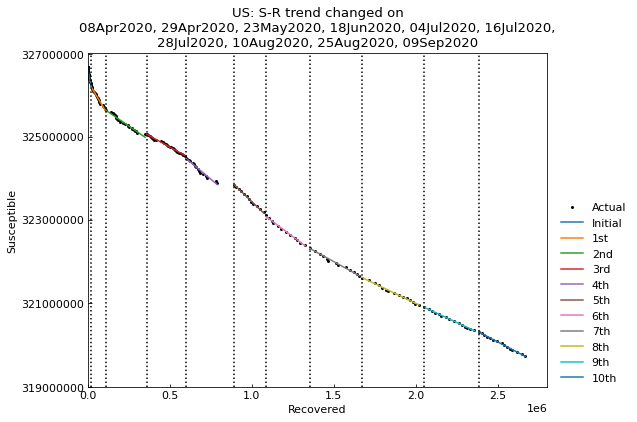

,Type,Start,End,Population
0th,Past,09Feb2020,07Apr2020,326687501
1st,Past,08Apr2020,28Apr2020,326687501
2nd,Past,29Apr2020,22May2020,326687501
3rd,Past,23May2020,17Jun2020,326687501
4th,Past,18Jun2020,03Jul2020,326687501
5th,Past,04Jul2020,15Jul2020,326687501
6th,Past,16Jul2020,27Jul2020,326687501
7th,Past,28Jul2020,09Aug2020,326687501
8th,Past,10Aug2020,24Aug2020,326687501
9th,Past,25Aug2020,08Sep2020,326687501


In [30]:
snl.trend()
snl.summary()

In [31]:
# Estimate SIR-F parameters

snl.estimate(cs.SIRD, timeout=120)


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	10th phase (09Sep2020 - 23Sep2020): finished  206 trials in 0 min 10 sec
Completed optimization. Total: 1 min 50 sec


In [32]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,kappa,rho,sigma,tau,1/alpha2 [day],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,09Feb2020,07Apr2020,326687501,SIR-D,41.57,0.000037,0.002404,0.000021,18,335,609,5,0.921648,699,1 min 10 sec
1st,Past,08Apr2020,28Apr2020,326687501,SIR-D,4.78,0.000046,0.000643,0.000088,18,270,141,19,0.048990,648,1 min 0 sec
2nd,Past,29Apr2020,22May2020,326687501,SIR-D,2.28,0.000021,0.000314,0.000117,18,603,107,39,0.041175,822,1 min 20 sec
3rd,Past,23May2020,17Jun2020,326687501,SIR-D,2.13,0.000008,0.000202,0.000087,18,1530,143,61,0.013943,122,0 min 10 sec
4th,Past,18Jun2020,03Jul2020,326687501,SIR-D,3.40,0.000004,0.000291,0.000081,18,2961,153,42,0.009419,646,1 min 0 sec
5th,Past,04Jul2020,15Jul2020,326687501,SIR-D,3.67,0.000004,0.000367,0.000095,18,2831,131,34,0.002900,123,0 min 10 sec
6th,Past,16Jul2020,27Jul2020,326687501,SIR-D,3.11,0.000004,0.000325,0.000100,18,2901,124,38,0.004353,132,0 min 10 sec
7th,Past,28Jul2020,09Aug2020,326687501,SIR-D,2.22,0.000005,0.000241,0.000104,18,2738,120,51,0.005275,130,0 min 10 sec
8th,Past,10Aug2020,24Aug2020,326687501,SIR-D,1.73,0.000004,0.000179,0.000099,18,3246,125,69,0.005269,130,0 min 10 sec
9th,Past,25Aug2020,08Sep2020,326687501,SIR-D,1.84,0.000003,0.000145,0.000076,18,4189,164,86,0.002551,206,0 min 10 sec


In [33]:
df_sird = snl.summary()
df_sird.to_csv("sirD-hyperparameter.csv")

# SEIR model

In [34]:
# Create instance of `Scenario` class
snl = cs.Scenario(jhu_data, population_data, country="US", province=None)

# Fix the first/last date of the records and today
# today must be in the range of (first_date, last_date).
# Default: None means automatically specified (min/max will be used)
snl.timepoints(first_date="09Feb2020", last_date="23Sep2020", today="23Sep2020")
# Check dates
print(snl.first_date)
print(snl.last_date)
print(snl.today)
# Summarize (Empty because no phases are registered)
snl.summary()

09Feb2020
23Sep2020
23Sep2020


""


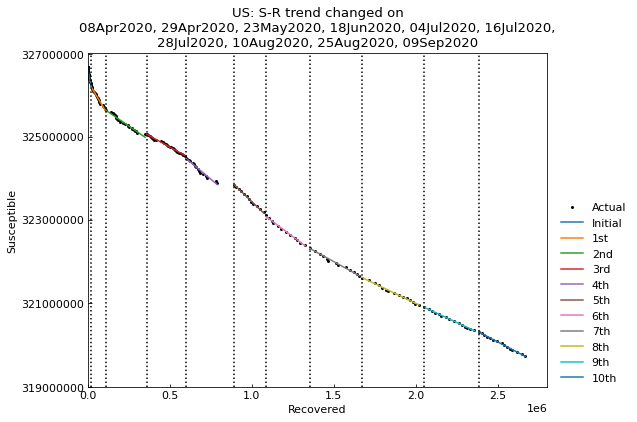

,Type,Start,End,Population
0th,Past,09Feb2020,07Apr2020,326687501
1st,Past,08Apr2020,28Apr2020,326687501
2nd,Past,29Apr2020,22May2020,326687501
3rd,Past,23May2020,17Jun2020,326687501
4th,Past,18Jun2020,03Jul2020,326687501
5th,Past,04Jul2020,15Jul2020,326687501
6th,Past,16Jul2020,27Jul2020,326687501
7th,Past,28Jul2020,09Aug2020,326687501
8th,Past,10Aug2020,24Aug2020,326687501
9th,Past,25Aug2020,08Sep2020,326687501


In [35]:
snl.trend()
snl.summary()